In [23]:
# join the inventory_sets and sets table, sets include the yeart and inventory_sets include the quantity
import pandas as pd
import numpy as np

In [14]:
# read the data -- sets
setsfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/sets.csv'
sets = pd.read_csv(setsfile,index_col = 'set_num')
sets.head()
#chech if the set_num is unique, it is unique,so the set_num is the primary key of the sets
sets.index.is_unique

True

In [35]:
#read data --- inventory sets
setsinvenfile = '~/Documents/MSofDS/Spring2018/DS-Project2/lego-database/inventory_sets.csv'
invenotry_sets = pd.read_csv(setsinvenfile,index_col = 'inventory_id')
invenotry_sets.head()
#check if the inventory id is unique, it is not, so inventory_id cannot be the primary key
invenotry_sets.index.is_unique
#so 
invenotry_sets = pd.read_csv(setsinvenfile)
invenotry_sets.head() #index from 0, 
#i think the primary key is iventory_id & set_num, check it

2846

In [40]:
#inner join sets and inventory sets
c1 = sets.merge(invenotry_sets, left_index = True, right_on = 'set_num',how = 'inner') 
c1.head()

,name,year,theme_id,num_parts,inventory_id,set_num,quantity
696,Weetabix Promotional House 1,1976,413,147,3574,00-2,1
697,Weetabix Promotional House 2,1976,413,149,3574,00-3,1
698,Weetabix Promotional Windmill,1976,413,126,3574,00-4,1
1321,Guarded Inn,2001,186,256,7474,10000-1,1
2428,Metroliner,2001,233,785,13941,10001-1,1


In [44]:
# how have the size of sets change over time?
# 1. group quantity by set_num and year
t1 = c1.groupby(['year', 'set_num'], as_index=False)['quantity'].sum()
size_by_year_setnum = t1.groupby(['year'],as_index = 'year')['quantity'].sum()
size_by_year_setnum.head # 1969  2

<bound method NDFrame.head of year
1969      2
1970      2
1976      3
1979      2
1980      1
1981     13
1982      1
1983      4
1984      5
1985      9
1986      6
1987      6
1988      3
1989     10
1990      5
1991     57
1992      5
1993     15
1994     13
1995      5
1996     11
1997     25
1998     77
1999     54
2000     84
2001    186
2002    189
2003    186
2004    166
2005    171
2006    111
2007    177
2008    154
2009    132
2010    228
2011    353
2012    457
2013    318
2014    334
2015    233
2016     66
2017     37
Name: quantity, dtype: int64>

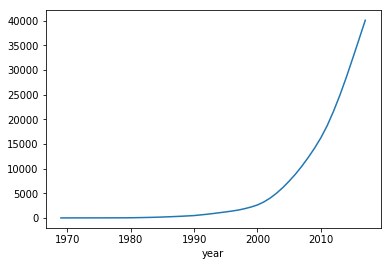

In [47]:
import matplotlib.pyplot as plt
size_by_year_setnum = size_by_year_setnum.cumsum()
size_by_year_setnum.plot()

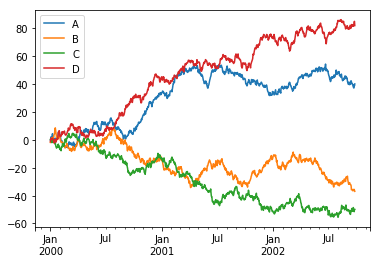

,A,B,C,D
2000-01-01,-0.137147,-1.844904,0.355343,-1.308755
2000-01-02,0.572156,-0.720912,0.460608,0.664685
2000-01-03,2.125862,-1.086463,-0.485355,1.045392
2000-01-04,1.593708,-0.904959,-0.763670,1.069701
2000-01-05,2.183231,0.331448,-1.008426,1.173436
